# Benin Solar Data EDA
This notebook performs exploratory data analysis on the Benin solar dataset.

In [28]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/benin-malanville.csv')
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 Rows:")
display(df.head())

Dataset Shape: (525600, 19)

Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']

First 5 Rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [29]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object


In [30]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

In [31]:
print("\nMissing Values:")
missing = df.isna().sum()
print(missing)
print("\nColumns with >5% Missing Values:")
missing_percent = (missing / len(df)) * 100
print(missing_percent[missing_percent > 5])


Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% Missing Values:
Comments    100.0
dtype: float64


In [32]:
from scipy.stats import zscore
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols].apply(zscore, nan_policy='omit')
outliers = (z_scores.abs() > 3).sum()
print("\nOutliers (|Z| > 3) per Column:")
print(outliers)
outlier_rows = df[(z_scores.abs() > 3).any(axis=1)]
print("\nNumber of Rows with Outliers:", len(outlier_rows))


Outliers (|Z| > 3) per Column:
GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64

Number of Rows with Outliers: 7740


In [33]:
# Impute missing values with median using assignment instead of inplace
for col in cols:
    df[col] = df[col].fillna(df[col].median())
print("\nMissing Values After Imputation:")
print(df[cols].isna().sum())
# Export cleaned data to the correct directory
df.to_csv('../data/benin_clean.csv', index=False)
print("Cleaned data exported to ../data/benin_clean.csv")


Missing Values After Imputation:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Cleaned data exported to ../data/benin_clean.csv


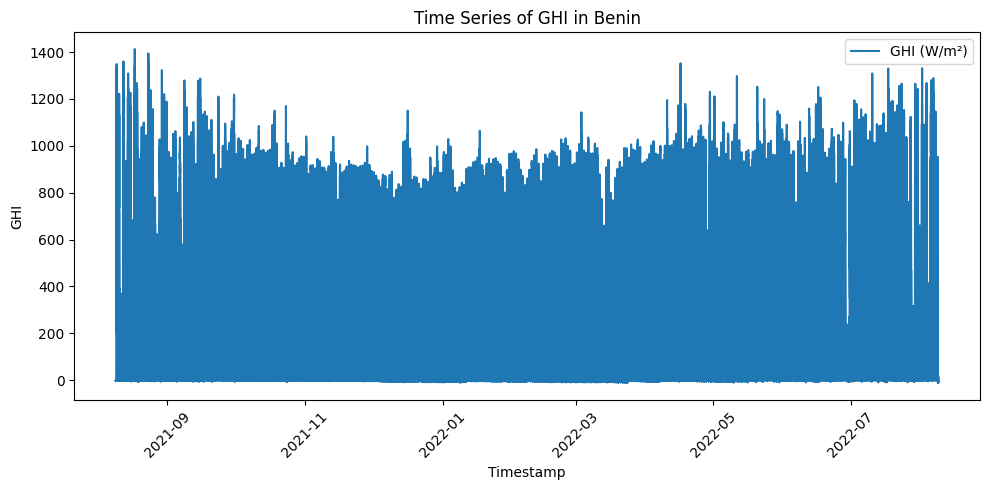

In [34]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['GHI'], label='GHI (W/m²)')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.title('Time Series of GHI in Benin')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

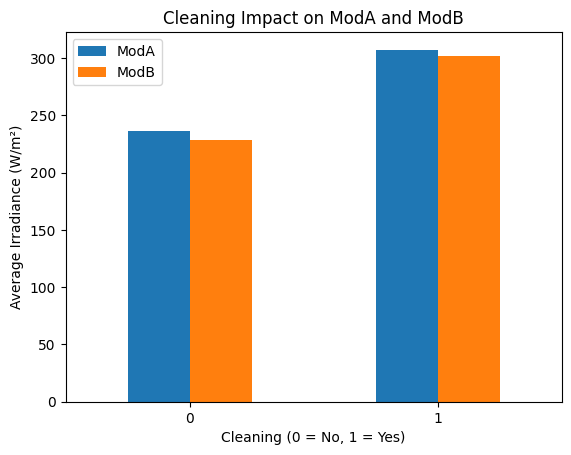

In [35]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
plt.figure(figsize=(8, 5))
cleaning_impact.plot(x='Cleaning', y=['ModA', 'ModB'], kind='bar')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Average Irradiance (W/m²)')
plt.title('Cleaning Impact on ModA and ModB')
plt.xticks(rotation=0)
plt.legend(['ModA', 'ModB'])
plt.show()

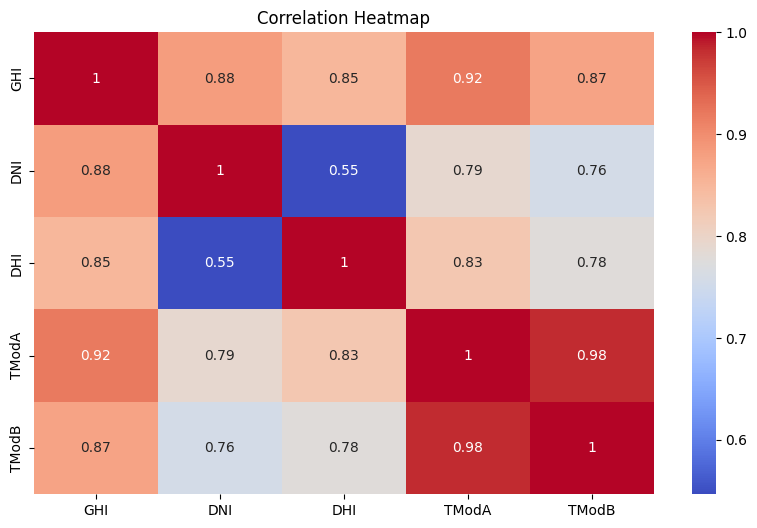

In [36]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

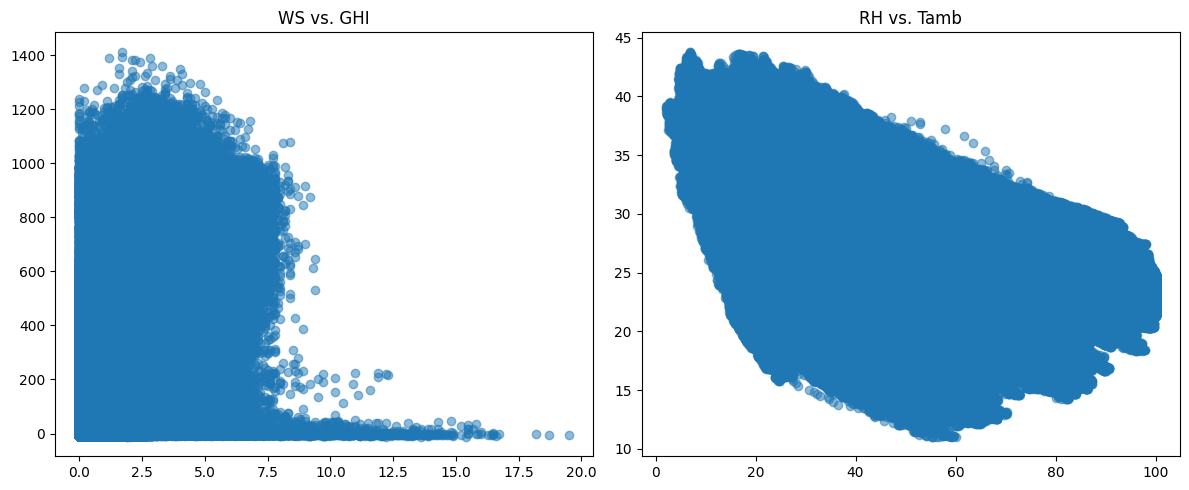

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(df['WS'], df['GHI'], alpha=0.5)
ax1.set_title('WS vs. GHI')
ax2.scatter(df['RH'], df['Tamb'], alpha=0.5)
ax2.set_title('RH vs. Tamb')
plt.tight_layout()
plt.show()

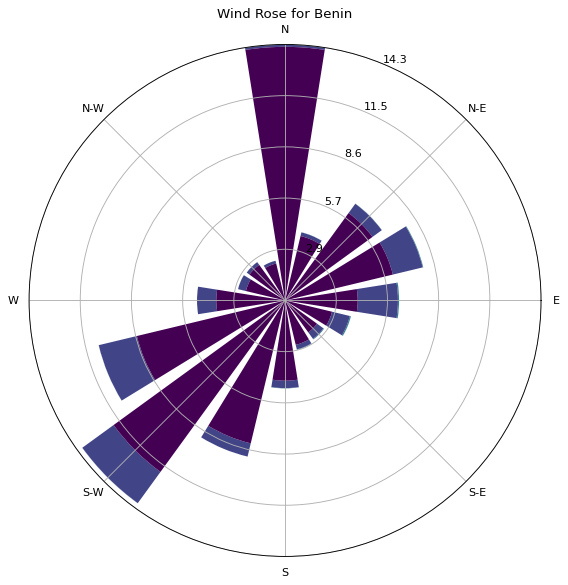

In [38]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8)
ax.set_title('Wind Rose for Benin')
plt.show()

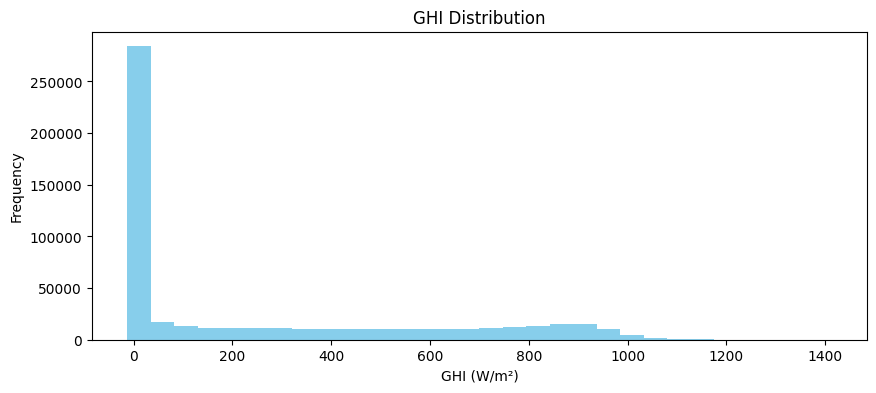

In [39]:
plt.figure(figsize=(10, 4))
plt.hist(df['GHI'], bins=30, color='skyblue')
plt.title('GHI Distribution')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.show()

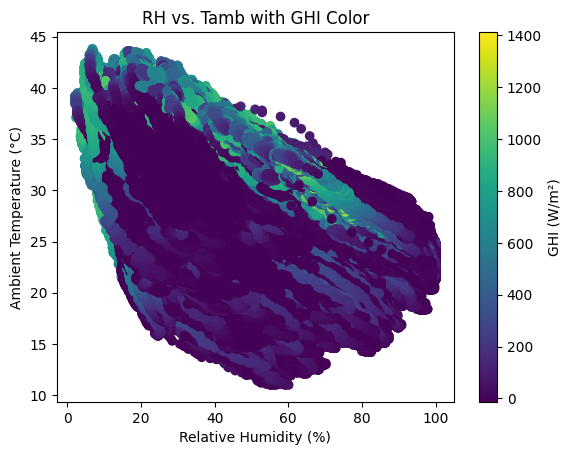

In [40]:
plt.scatter(df['RH'], df['Tamb'], c=df['GHI'], cmap='viridis')
plt.colorbar(label='GHI (W/m²)')
plt.title('RH vs. Tamb with GHI Color')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()

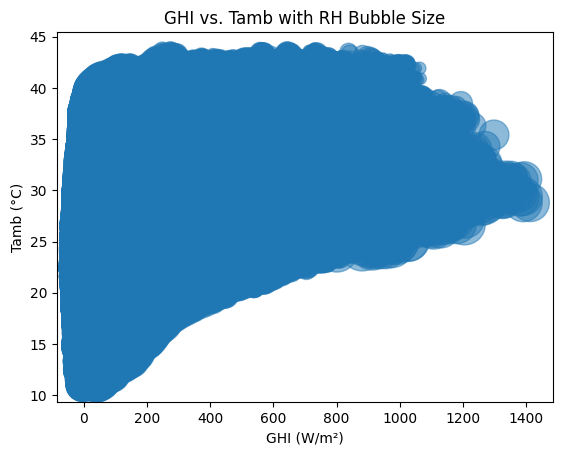

In [41]:
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
plt.title('GHI vs. Tamb with RH Bubble Size')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.show()